# Esport - CS2 demo analysis

This jupyter notebook can be found here https://drive.google.com/file/d/11yr8qwfT3YO204pEjOpYRfRXDcGdGQQV/view?usp=sharing

- Demo file: https://drive.google.com/file/d/1AVZ3IdrN-TCkclVUcSEyjwrYMH58aqWe/view?usp=sharing
- Map: https://drive.google.com/file/d/1jQZULatBDxeBHUeQfj9XUgFDbwjwvKhm/view?usp=sharing

Project requirements:
<br>numpy
<br>pandas
<br>matplotlib
<br>demoparser2
<br>jupyterlab
<br>seaborn

Useful links:
- HLTV results - https://www.hltv.org/results
- CS2 events - https://cs2.poggu.me/dumped-data/game-events/
- CS2 map sizes - https://github.com/pnxenopoulos/awpy/blob/main/awpy/data/map_data.py

CS2 Parser:
- Parser - https://github.com/LaihoE/demoparser
- Documentation - https://github.com/LaihoE/demoparser/tree/main/documentation/python
- Example - https://github.com/LaihoE/demoparser/blob/main/examples/1vX/main.py
- Examples - https://github.com/LaihoE/demoparser/tree/main/examples

## Imports

In [141]:
from demoparser2 import DemoParser
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from matplotlib.collections import LineCollection
from matplotlib import cm
import matplotlib.ticker as ticker
import seaborn as sns
import pandas as pd

## Functions

In [2]:
def draw_map(df):
    plt.figure(figsize=(10, 6))
    plt.scatter(df['X'], df['Y'], c='blue', marker='o', label='Player Positions')
    plt.xlim(-2800, 1500)
    plt.ylim(-3000, 1000)
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.title('2D Map of Player Positions')
    plt.grid(True)
    plt.legend()
    plt.show()

In [3]:
def draw_movement(df_all, df_path=None):
    plt.figure(figsize=(10, 6))
    plt.figure(figsize=(10, 6))

    img = mpimg.imread('Cs2_mirage_radar.webp')
    # Plot the image behind the points
    plt.imshow(img, extent=[-3230, 1883, -3490, 1713], aspect='auto')  # Extent sets the image limits

    plt.scatter(df_all['X'], df_all['Y'], c='blue', marker='o', label='Player Positions')

    if df_path is not None:
        plt.scatter(df_path['X'], df_path['Y'], color='red', linewidth=2, label='Highlighted path', marker='o')

    plt.xlim(-2800, 1500)
    plt.ylim(-3000, 1000)

    # Adding labels and title
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.title('2D Map of Player Positions')

    # Display the plot
    plt.grid(True)
    plt.legend()
    plt.show()

# Data overview

In [4]:
parser = DemoParser("demos/eternal-fire-vs-natus-vincere-m2-mirage.dem")

## Events

In [5]:
df_deaths = parser.parse_event("player_death", player=["X", "Y"], other=["total_rounds_played"])
df_weapon_fires = parser.parse_event("weapon_fire", player=["X", "Y"], other=["total_rounds_played"])
df_player_spawns = parser.parse_event("player_spawn", other=["total_rounds_played"])
df_player_teams = parser.parse_event("player_team", other=["total_rounds_played"])
df_player_hurts = parser.parse_event("player_hurt", other=["total_rounds_played"])
df_round_starts = parser.parse_event("round_start")
df_round_ends = parser.parse_event("round_end")
df_last_round_half = parser.parse_event("round_announce_last_round_half")
df_item_purchases = parser.parse_event("item_purchase", other=["total_rounds_played"])
df_item_pickups = parser.parse_event("item_pickup", other=["total_rounds_played"])
df_bomb_plants = parser.parse_event("bomb_planted", other=["total_rounds_played"])
df_bomb_defuses = parser.parse_event("bomb_defused", other=["total_rounds_played"])
df_bomb_explosions = parser.parse_event("bomb_exploded", other=["total_rounds_played"])
df_bomb_drops = parser.parse_event("bomb_dropped", other=["total_rounds_played"])
df_bomb_pickups = parser.parse_event("bomb_pickup", other=["total_rounds_played"])
df_hegrenade_detonations = parser.parse_event("hegrenade_detonate", other=["total_rounds_played"])
df_flashbang_detonations = parser.parse_event("flashbang_detonate", other=["total_rounds_played"])
df_smokegrenade_detonations = parser.parse_event("smokegrenade_detonate", other=["total_rounds_played"])
df_smokegrenade_expirations = parser.parse_event("smokegrenade_expired", other=["total_rounds_played"])
df_inferno_startburns = parser.parse_event("inferno_startburn", other=["total_rounds_played"])
df_inferno_expirations = parser.parse_event("inferno_expire", other=["total_rounds_played"])
df_player_pings = parser.parse_event("player_ping", other=["total_rounds_played"])
df_player_sounds = parser.parse_event("player_sound", other=["total_rounds_played"])
df_ticks = parser.parse_ticks(["X", "Y"])

In [6]:
max_round = df_player_spawns["total_rounds_played"].max() + 1
max_round

np.int32(18)

Team interpretation in numbers:
- 3 = CT
- 2 = T

In [7]:
df_player_teams

,disconnect,isbot,oldteam,silent,team,tick,total_rounds_played,user_name,user_steamid
0,False,False,2,True,3,87273,12,jL,76561198176878303
1,False,False,3,True,2,87273,12,Calyx,76561198052546265
2,False,False,2,True,3,87273,12,w0nderful,76561199063068840
3,False,False,3,True,2,87273,12,Wicadia,76561198812513923
4,False,False,3,True,2,87273,12,MAJ3R,76561197967432889
5,False,False,2,True,3,87273,12,Aleksib,76561198013243326
6,False,False,3,True,2,87273,12,XANTARES,76561198044118796
7,False,False,2,True,3,87273,12,b1t,76561198246607476
8,False,False,2,True,3,87273,12,iM,76561198050250233
9,False,False,3,True,2,87273,12,woxic,76561198083485506


In [8]:
# Another approach
df_team_info2 = parser.parse_player_info();
df_team_info2

,steamid,name,team_number
0,76561198176878303,jL,3
1,76561198052546265,Calyx,2
2,76561199063068840,w0nderful,3
3,76561198812513923,Wicadia,2
4,76561197967432889,MAJ3R,2
5,76561198013243326,Aleksib,3
6,76561198044118796,XANTARES,2
7,76561198246607476,b1t,3
8,76561198050250233,iM,3
9,76561198083485506,woxic,2


In [9]:
df_deaths

,assistedflash,assister_X,assister_Y,assister_name,assister_steamid,attacker_X,attacker_Y,attacker_name,attacker_steamid,attackerblind,...,total_rounds_played,user_X,user_Y,user_name,user_steamid,weapon,weapon_fauxitemid,weapon_itemid,weapon_originalowner_xuid,wipe
0,False,NaN,NaN,None,None,296.651398,-1586.485962,Aleksib,76561198013243326,False,...,0,150.391434,-1526.738159,Wicadia,76561198812513923,glock,17293822569165815812,20660576547,,0
1,False,NaN,NaN,None,None,-452.761658,-1758.071045,Aleksib,76561198013243326,False,...,0,-531.607178,-2378.742432,XANTARES,76561198044118796,glock,17293822569165815812,20660576547,,0
2,False,-531.607178,-2378.742432,XANTARES,76561198044118796,-1570.978027,-760.632751,MAJ3R,76561197967432889,False,...,0,-1272.865112,-1050.418091,iM,76561198050250233,usp_silencer,17293822569145761853,13626608964,,0
3,False,NaN,NaN,None,None,-812.001831,-2082.587646,w0nderful,76561199063068840,False,...,0,-465.970337,-2350.779785,Calyx,76561198052546265,glock,17293822569105195012,34398553971,,0
4,False,NaN,NaN,None,None,NaN,NaN,None,None,False,...,0,-1693.296631,-1375.607422,Aleksib,76561198013243326,planted_c4,,,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,False,NaN,NaN,None,None,-1698.991211,682.782166,jL,76561198176878303,False,...,17,-1064.924072,151.871338,XANTARES,76561198044118796,m4a1_silencer,17293822569131868220,34241486015,,0
121,False,-2065.616211,-559.346924,iM,76561198050250233,-1699.885620,681.705627,jL,76561198176878303,False,...,17,-1210.908081,285.837585,MAJ3R,76561197967432889,m4a1_silencer,17293822569131868220,34241486015,,0
122,False,-1064.924072,151.871338,XANTARES,76561198044118796,-1022.358459,120.646042,woxic,76561198083485506,False,...,17,-1699.831299,683.073303,jL,76561198176878303,ak47,17293822569170534407,25065970543,,0
123,False,-1699.792603,683.121765,jL,76561198176878303,-2495.580322,328.931458,Aleksib,76561198013243326,False,...,17,-1021.273499,123.897125,woxic,76561198083485506,deagle,17293822569105129473,29398974889,,0


In [10]:
df_deaths.keys()

Index(['assistedflash', 'assister_X', 'assister_Y', 'assister_name',
       'assister_steamid', 'attacker_X', 'attacker_Y', 'attacker_name',
       'attacker_steamid', 'attackerblind', 'attackerinair', 'distance',
       'dmg_armor', 'dmg_health', 'dominated', 'headshot', 'hitgroup',
       'noreplay', 'noscope', 'penetrated', 'revenge', 'thrusmoke', 'tick',
       'total_rounds_played', 'user_X', 'user_Y', 'user_name', 'user_steamid',
       'weapon', 'weapon_fauxitemid', 'weapon_itemid',
       'weapon_originalowner_xuid', 'wipe'],
      dtype='object')

## Movements

In [11]:
df_movements = parser.parse_ticks(["X", "Y", "team_rounds_total", "team_name", "is_alive", "total_rounds_played"])
df_movements

,total_rounds_played,team_rounds_total,team_name,X,Y,is_alive,tick,steamid,name
0,0,0,TERRORIST,1136.047729,-160.015564,True,1,76561198176878303,jL
1,0,0,CT,-1656.000000,-1800.000000,True,1,76561198052546265,Calyx
2,0,0,TERRORIST,1216.000000,-307.000000,True,1,76561199063068840,w0nderful
3,0,0,CT,-1656.000000,-1976.000000,True,1,76561198812513923,Wicadia
4,0,0,CT,-1776.000000,-1976.000000,True,1,76561197967432889,MAJ3R
...,...,...,...,...,...,...,...,...,...
1405715,18,13,CT,-2216.906006,621.395386,False,140592,76561198013243326,Aleksib
1405716,18,5,TERRORIST,-1064.924072,151.871338,False,140592,76561198044118796,XANTARES
1405717,18,13,CT,-701.487671,-1357.026489,False,140592,76561198246607476,b1t
1405718,18,13,CT,-1807.516724,-54.575256,True,140592,76561198050250233,iM


Rename "TERRORIST" into "T" to match the naming.

In [12]:
df_movements.loc[:, "team_name"] = df_movements["team_name"].replace("TERRORIST", "T")
df_movements

,total_rounds_played,team_rounds_total,team_name,X,Y,is_alive,tick,steamid,name
0,0,0,T,1136.047729,-160.015564,True,1,76561198176878303,jL
1,0,0,CT,-1656.000000,-1800.000000,True,1,76561198052546265,Calyx
2,0,0,T,1216.000000,-307.000000,True,1,76561199063068840,w0nderful
3,0,0,CT,-1656.000000,-1976.000000,True,1,76561198812513923,Wicadia
4,0,0,CT,-1776.000000,-1976.000000,True,1,76561197967432889,MAJ3R
...,...,...,...,...,...,...,...,...,...
1405715,18,13,CT,-2216.906006,621.395386,False,140592,76561198013243326,Aleksib
1405716,18,5,T,-1064.924072,151.871338,False,140592,76561198044118796,XANTARES
1405717,18,13,CT,-701.487671,-1357.026489,False,140592,76561198246607476,b1t
1405718,18,13,CT,-1807.516724,-54.575256,True,140592,76561198050250233,iM


<Figure size 1000x600 with 0 Axes>

/home/vasek/venv/skj/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


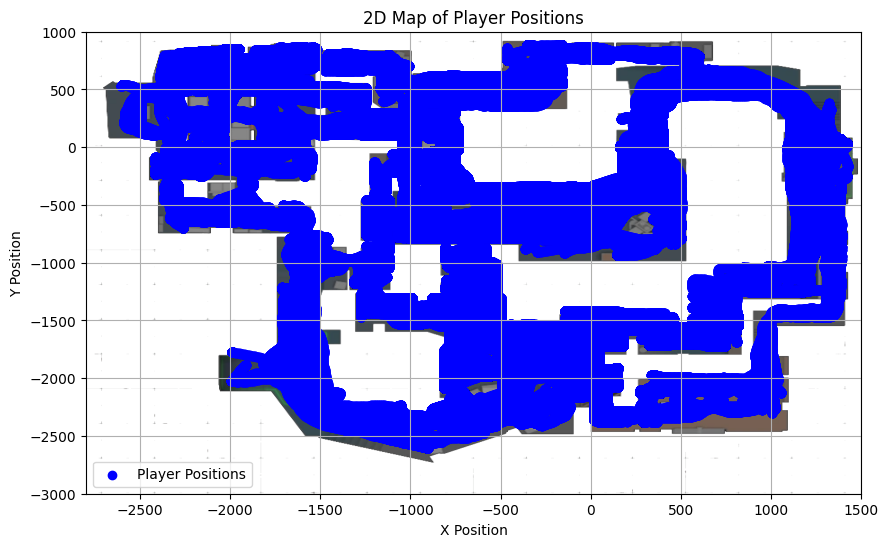

In [13]:
draw_movement(df_movements)

### Player "Calyx" movements

All selected movements for a specific player with name Calyx.

In [14]:
df_calyx_movement = df_movements[(df_movements["name"] == "Calyx")]
df_calyx_movement

,total_rounds_played,team_rounds_total,team_name,X,Y,is_alive,tick,steamid,name
1,0,0,CT,-1656.000000,-1800.000000,True,1,76561198052546265,Calyx
11,0,0,CT,-1656.000000,-1800.000000,True,2,76561198052546265,Calyx
21,0,0,CT,-1656.000000,-1800.000000,True,3,76561198052546265,Calyx
31,0,0,CT,-1656.000000,-1800.000000,True,4,76561198052546265,Calyx
41,0,0,CT,-1656.000000,-1800.000000,True,5,76561198052546265,Calyx
...,...,...,...,...,...,...,...,...,...
1405671,18,5,T,-1736.228027,849.113464,False,140588,76561198052546265,Calyx
1405681,18,5,T,-1736.228027,849.113464,False,140589,76561198052546265,Calyx
1405691,18,5,T,-1736.228027,849.113464,False,140590,76561198052546265,Calyx
1405701,18,5,T,-1736.228027,849.113464,False,140591,76561198052546265,Calyx


Selected movements for the first round only.

In [15]:
df_calyx_movement_round1 = df_calyx_movement[(df_calyx_movement["total_rounds_played"]) == 0]
df_calyx_movement_round1

,total_rounds_played,team_rounds_total,team_name,X,Y,is_alive,tick,steamid,name
1,0,0,CT,-1656.000000,-1800.000000,True,1,76561198052546265,Calyx
11,0,0,CT,-1656.000000,-1800.000000,True,2,76561198052546265,Calyx
21,0,0,CT,-1656.000000,-1800.000000,True,3,76561198052546265,Calyx
31,0,0,CT,-1656.000000,-1800.000000,True,4,76561198052546265,Calyx
41,0,0,CT,-1656.000000,-1800.000000,True,5,76561198052546265,Calyx
...,...,...,...,...,...,...,...,...,...
58601,0,0,CT,-465.557495,-2350.714355,False,5861,76561198052546265,Calyx
58611,0,0,CT,-465.557495,-2350.714355,False,5862,76561198052546265,Calyx
58621,0,0,CT,-465.557495,-2350.714355,False,5863,76561198052546265,Calyx
58631,0,0,CT,-465.557495,-2350.714355,False,5864,76561198052546265,Calyx


#### First round movement

<Figure size 1000x600 with 0 Axes>

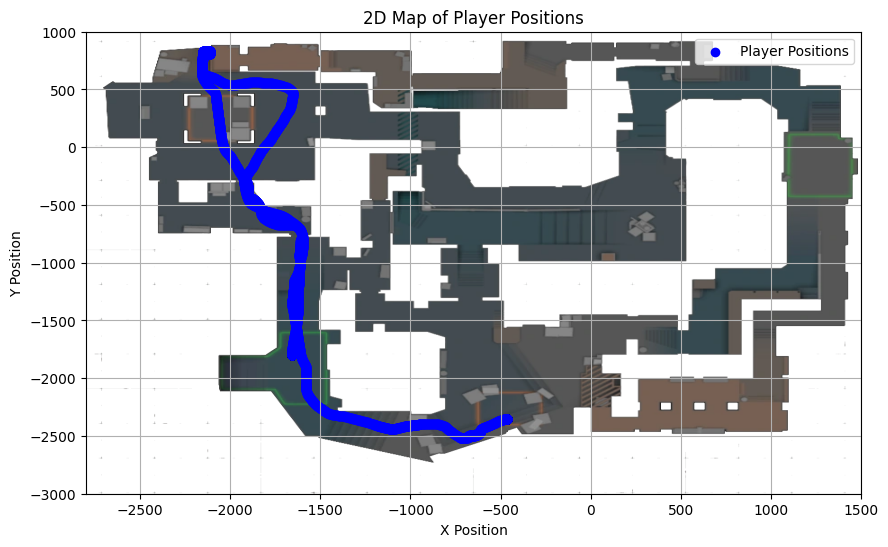

In [16]:
draw_movement(df_calyx_movement_round1)

Filter all movement for comparison to make calculation faster.

In [17]:
df_movements_filtered = df_movements[::5]
df_movements_filtered

,total_rounds_played,team_rounds_total,team_name,X,Y,is_alive,tick,steamid,name
0,0,0,T,1136.047729,-160.015564,True,1,76561198176878303,jL
5,0,0,T,1296.000000,32.000000,True,1,76561198013243326,Aleksib
10,0,0,T,1136.047729,-160.015564,True,2,76561198176878303,jL
15,0,0,T,1296.000000,32.000000,True,2,76561198013243326,Aleksib
20,0,0,T,1136.047729,-160.015564,True,3,76561198176878303,jL
...,...,...,...,...,...,...,...,...,...
1405695,18,13,CT,-2216.906006,621.395386,False,140590,76561198013243326,Aleksib
1405700,18,13,CT,-1699.792603,683.121765,False,140591,76561198176878303,jL
1405705,18,13,CT,-2216.906006,621.395386,False,140591,76561198013243326,Aleksib
1405710,18,13,CT,-1699.792603,683.121765,False,140592,76561198176878303,jL


In [18]:
print(f"df_movements:\t\t{df_movements.size}\ndf_movements_filtered:\t {df_movements_filtered.size}")

df_movements:		12651480
df_movements_filtered:	 2530296


<Figure size 1000x600 with 0 Axes>

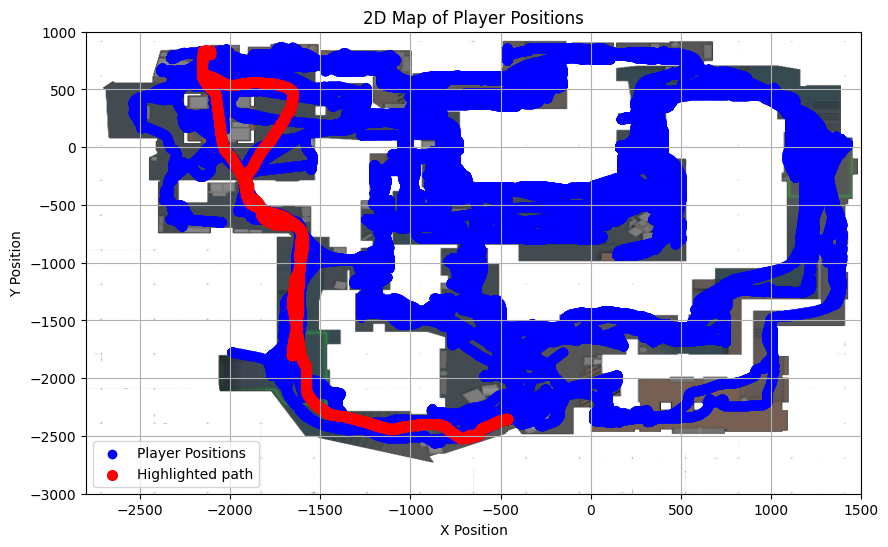

In [19]:
draw_movement(df_movements_filtered, df_calyx_movement_round1)

#### All movements as a CT

All movements for player named Calyx in the CT team.

<Figure size 1000x600 with 0 Axes>

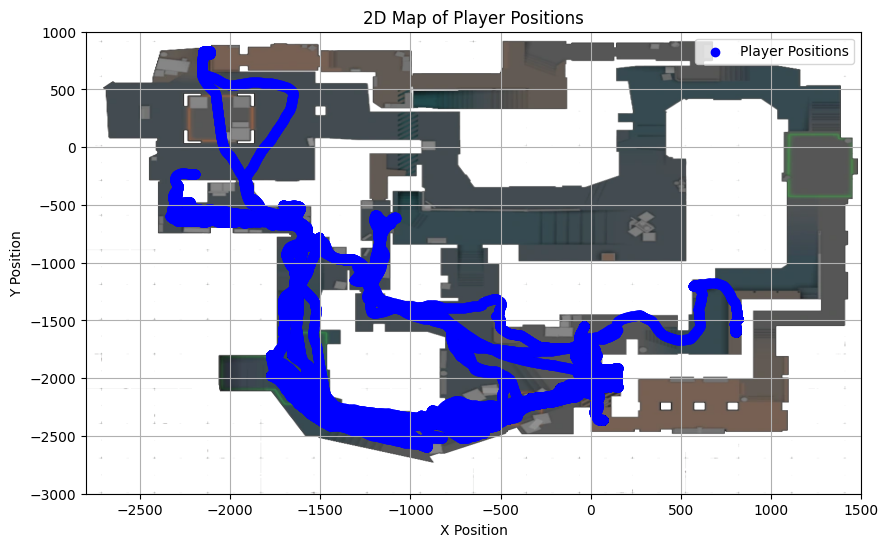

In [20]:
draw_movement(df_calyx_movement[(df_calyx_movement["team_name"] == "CT")])

Comparison of Calyx movements in the CT team with all movements.

<Figure size 1000x600 with 0 Axes>

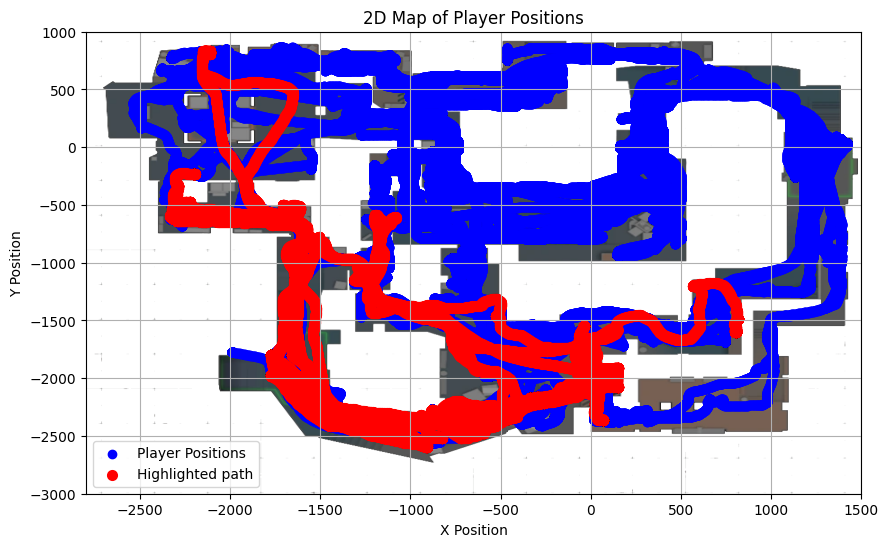

In [21]:
draw_movement(df_movements_filtered, df_calyx_movement[(df_calyx_movement["team_name"] == "CT")])

#### All movements as a T

All movements for player named Calyx in the T team.

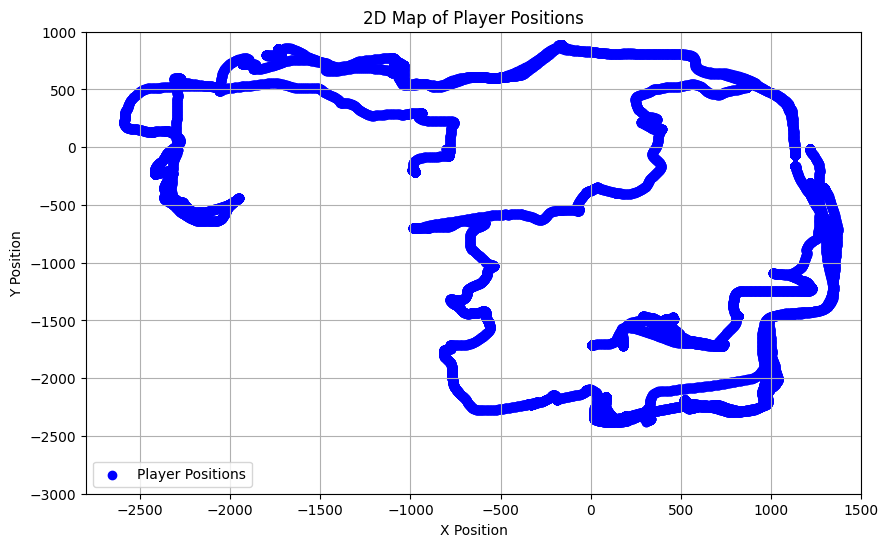

In [22]:
draw_map(df_calyx_movement[(df_calyx_movement["team_name"] == "T")])

Comparison of Calyx movements in the T team with all movements.

<Figure size 1000x600 with 0 Axes>

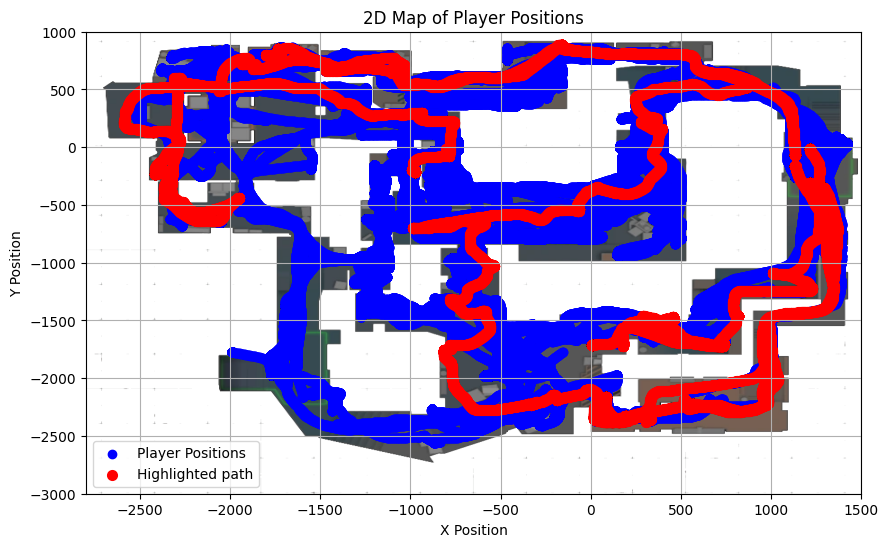

In [23]:
draw_movement(df_movements_filtered, df_calyx_movement[(df_calyx_movement["team_name"] == "T")])

## Purchases

Data overview of purchase event table for all game rounds.

In [24]:
df_item_purchases

,cost,custom_name,float,inventory_slot,item_name,name,paint_seed,skin,skin_id,steamid,stickers,tick,total_rounds_played,was_sold
0,650,None,NaN,0,Kevlar Vest,Wicadia,NaN,None,NaN,76561198812513923,[],87,0,False
1,650,None,NaN,0,Kevlar Vest,woxic,NaN,None,NaN,76561198083485506,[],106,0,False
2,300,,0.059664,0,P250,jL,762.320618,Supernova,358.0,76561198176878303,"[{'id': 1574, 'name': 'cologne2016_signature_s...",137,0,True
3,300,None,NaN,1,Smoke Grenade,jL,NaN,None,NaN,76561198176878303,[],159,0,False
4,200,None,NaN,2,Flashbang,jL,NaN,None,NaN,76561198176878303,[],170,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,400,None,NaN,2,Molotov,woxic,NaN,None,NaN,76561198083485506,[],134774,17,False
752,200,None,NaN,3,Flashbang,woxic,NaN,None,NaN,76561198083485506,[],134774,17,False
753,200,None,NaN,3,Flashbang,Wicadia,NaN,None,NaN,76561198812513923,[],134915,17,False
754,300,None,NaN,4,Smoke Grenade,woxic,NaN,None,NaN,76561198083485506,[],135029,17,False


### All rounds purchases

Total number of purchases for each item.

In [25]:
item_name_counts_df = df_item_purchases.groupby('item_name').size().reset_index(name='count')
item_name_counts_df

,item_name,count
0,AK-47,33
1,AWP,9
2,Decoy Grenade,1
3,Defuse Kit,15
4,Desert Eagle,11
5,Dual Berettas,2
6,Five-SeveN,1
7,Flashbang,163
8,Galil AR,11
9,High Explosive Grenade,76


Plotting the chart of purchases for each weapon using pure matplotlib.

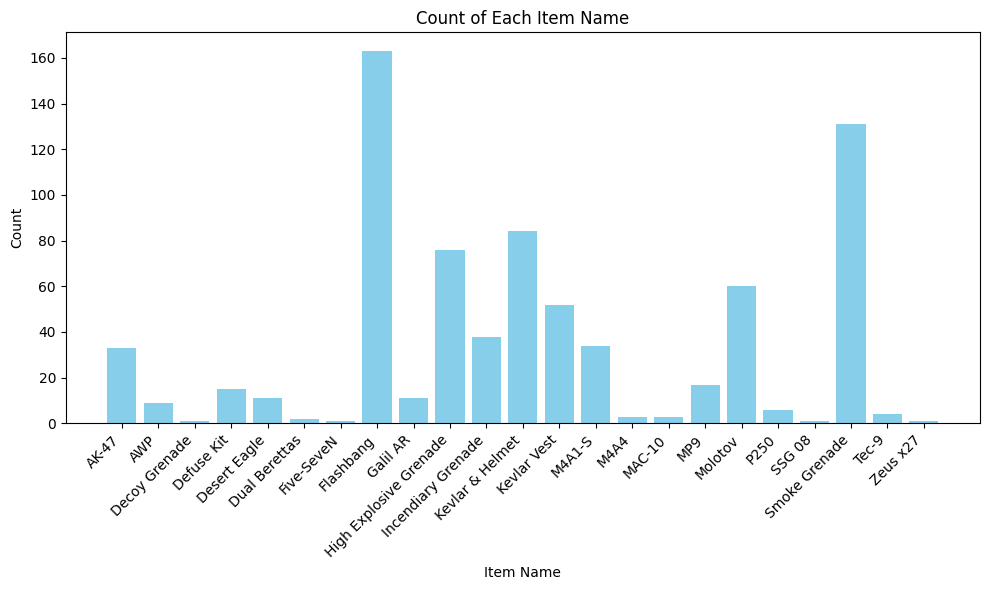

In [26]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(item_name_counts_df['item_name'], item_name_counts_df['count'], color='skyblue')

# Adding labels and title
plt.xlabel('Item Name')
plt.ylabel('Count')
plt.title('Count of Each Item Name')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

Using seaborn package to plot the chart instead.

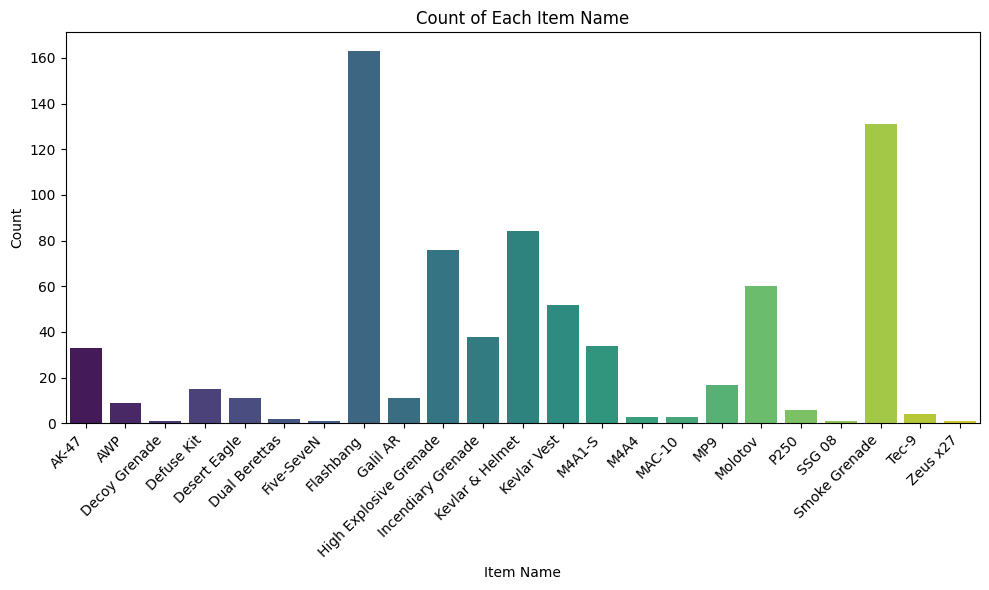

In [27]:
# Plotting with hue
plt.figure(figsize=(10, 6))
sns.barplot(x='item_name', y='count', data=item_name_counts_df, hue='item_name', palette='viridis')

# Adding labels and title
plt.xlabel('Item Name')
plt.ylabel('Count')
plt.title('Count of Each Item Name')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

### Grouped item purchases for each player

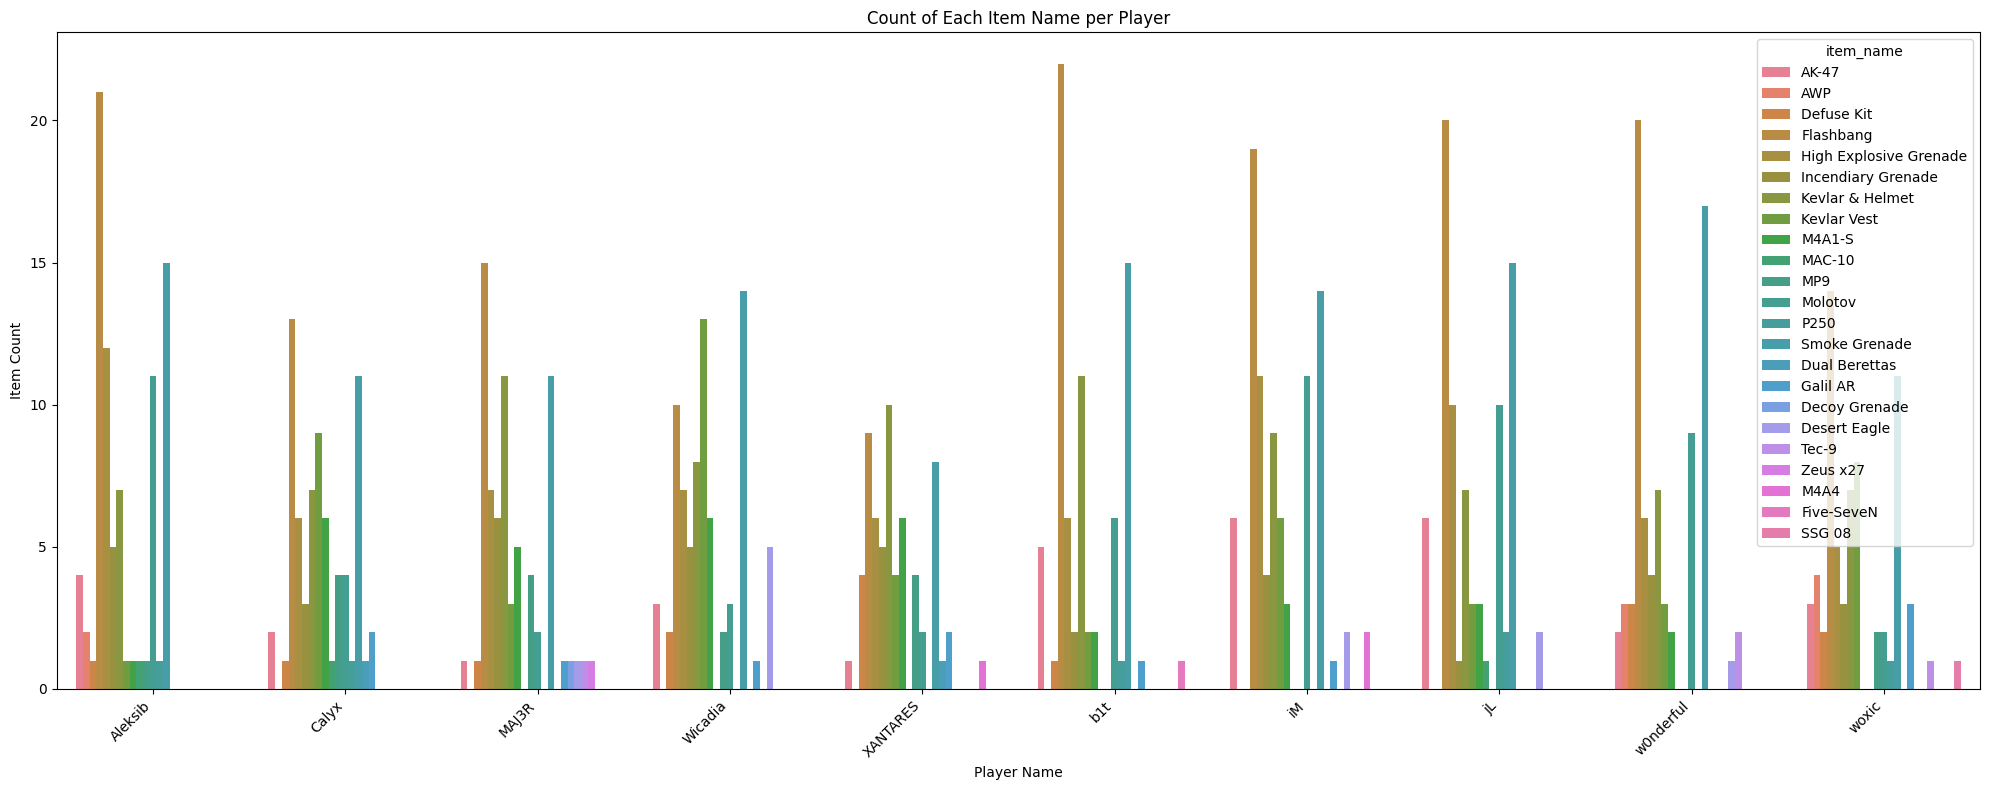

In [28]:
# Group by 'name' and 'item_name' to get the count of each item per player
item_name_per_player = df_item_purchases.groupby(['name', 'item_name']).size().reset_index(name='count')

# Plotting with seaborn
plt.figure(figsize=(20, 8))
sns.barplot(x='name', y='count', hue='item_name', data=item_name_per_player)

# Adding labels and title
plt.xlabel('Player Name')
plt.ylabel('Item Count')
plt.title('Count of Each Item Name per Player')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Task 1

Choose and analyse **four** situation that you find interesting and can be used as an information used to improve players' knowledge.

Here are some examples:
- Identifying most frequent weapon used - determine the most frequently fired weapon by each player across the demo
- Tracking player deaths over time - track the number of deaths for each player across the rounds
- Finding players with highest damage taken - identify players who took the most damage in the demo
- Bomb events analysis - track bomb planting and defusing events over rounds
- Flashbang and HE grenade effectiveness - measure the effectiveness of flashbangs and HE grenades by their usage and detonations
- Team composition over time - track how player teams changed over the course of the game

## 1. Identifying most frequent weapon used - determine the most frequently fired weapon by each player across the demo


In [154]:
# Display the DataFrame
df_weapon_fires

,silenced,tick,total_rounds_played,user_X,user_Y,user_name,user_steamid,weapon
0,False,1258,0,1296.000000,32.000000,Aleksib,76561198013243326,weapon_smokegrenade
1,False,1514,0,-1372.368164,-977.939453,XANTARES,76561198044118796,weapon_knife_karambit
2,False,1661,0,-1921.021362,-325.519287,Calyx,76561198052546265,weapon_knife_karambit
3,False,1723,0,386.088837,51.468979,b1t,76561198246607476,weapon_flashbang
4,True,1766,0,-1174.323120,-727.842529,XANTARES,76561198044118796,weapon_usp_silencer
...,...,...,...,...,...,...,...,...
3066,False,137623,17,-2260.312012,628.897278,Aleksib,76561198013243326,weapon_deagle
3067,False,137650,17,-2255.038330,627.889587,Aleksib,76561198013243326,weapon_deagle
3068,True,137667,17,-1801.680664,-54.884399,iM,76561198050250233,weapon_m4a1_silencer
3069,True,137674,17,-1800.396851,-55.175659,iM,76561198050250233,weapon_m4a1_silencer


In [155]:
# Group the weapon fire events by player and weapon
# df_weapon_fires contains all weapon fire events, including the player who fired and the weapon used
# 'groupby(['user_name', 'weapon'])' combines all events where the same player fired the same weapon
# '.size()' counts how many times each player fired each weapon
# '.reset_index(name='count')' converts the resulting counts into a DataFrame with a 'count' column
weapon_counts = df_weapon_fires.groupby(['user_name', 'weapon']).size().reset_index(name='count')

# Display the resulting DataFrame
weapon_counts

,user_name,weapon,count
0,Aleksib,weapon_ak47,157
1,Aleksib,weapon_deagle,6
2,Aleksib,weapon_flashbang,15
3,Aleksib,weapon_galilar,2
4,Aleksib,weapon_glock,28
...,...,...,...
127,woxic,weapon_p250,7
128,woxic,weapon_smokegrenade,7
129,woxic,weapon_ssg08,4
130,woxic,weapon_tec9,3


In [156]:
# For each player, find the index of the weapon they fired the most
# 'groupby('user_name')['count']' groups the data by player and looks at the 'count' column
# 'idxmax()' returns the index of the maximum count for each player
idx = weapon_counts.groupby('user_name')['count'].idxmax()

# Use the indices to select only the most fired weapon for each player
# '.loc[idx]' selects the rows corresponding to the maximum counts
# '.reset_index(drop=True)' resets the DataFrame index for cleaner display
player_most_fired_weapons = weapon_counts.loc[idx].reset_index(drop=True)

# Display the resulting DataFrame
player_most_fired_weapons

,user_name,weapon,count
0,Aleksib,weapon_ak47,157
1,Calyx,weapon_galilar,56
2,MAJ3R,weapon_knife_ursus,70
3,Wicadia,weapon_m4a1_silencer,158
4,XANTARES,weapon_m4a1_silencer,107
5,b1t,weapon_ak47,117
6,iM,weapon_ak47,104
7,jL,weapon_ak47,206
8,w0nderful,weapon_ak47,79
9,woxic,weapon_mp9,65


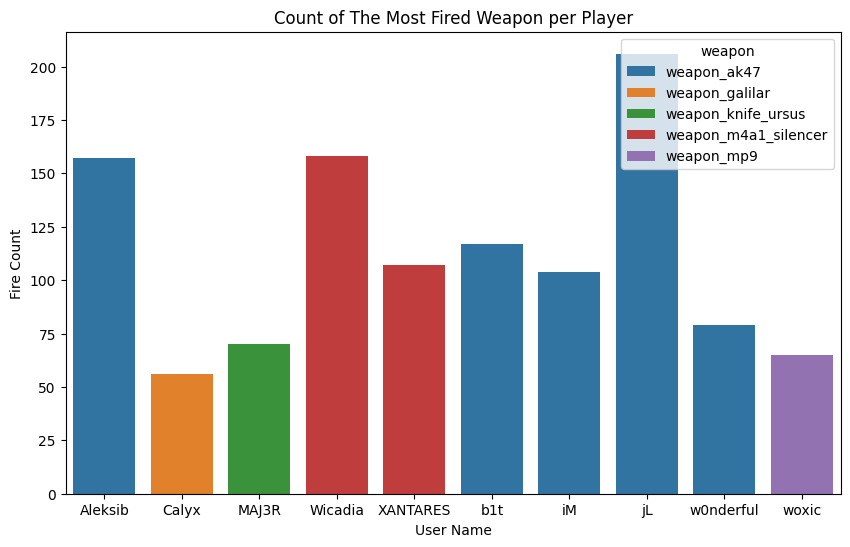

In [157]:
# Create a new figure with size 10x6 inches
plt.figure(figsize=(10, 6))

# Create a barplot to visualize the most fired weapon per player
# x = player names, y = fire count, hue = weapon type (color-coded)
# 'data=player_most_fired_weapons' provides the DataFrame for the plot
sns.barplot(x='user_name', y='count', hue='weapon', data=player_most_fired_weapons)

# Add a title to the chart
plt.title('Count of The Most Fired Weapon per Player')

# Label the x-axis (players)
plt.xlabel('User Name')

# Label the y-axis (number of shots fired)
plt.ylabel('Fire Count')

# Show the plot in the notebook
plt.show()


## 2. Tracking player deaths over time - track the number of deaths for each player across the rounds


In [82]:
# Display the DataFrame
df_deaths

,assistedflash,assister_X,assister_Y,assister_name,assister_steamid,attacker_X,attacker_Y,attacker_name,attacker_steamid,attackerblind,...,total_rounds_played,user_X,user_Y,user_name,user_steamid,weapon,weapon_fauxitemid,weapon_itemid,weapon_originalowner_xuid,wipe
0,False,NaN,NaN,None,None,296.651398,-1586.485962,Aleksib,76561198013243326,False,...,0,150.391434,-1526.738159,Wicadia,76561198812513923,glock,17293822569165815812,20660576547,,0
1,False,NaN,NaN,None,None,-452.761658,-1758.071045,Aleksib,76561198013243326,False,...,0,-531.607178,-2378.742432,XANTARES,76561198044118796,glock,17293822569165815812,20660576547,,0
2,False,-531.607178,-2378.742432,XANTARES,76561198044118796,-1570.978027,-760.632751,MAJ3R,76561197967432889,False,...,0,-1272.865112,-1050.418091,iM,76561198050250233,usp_silencer,17293822569145761853,13626608964,,0
3,False,NaN,NaN,None,None,-812.001831,-2082.587646,w0nderful,76561199063068840,False,...,0,-465.970337,-2350.779785,Calyx,76561198052546265,glock,17293822569105195012,34398553971,,0
4,False,NaN,NaN,None,None,NaN,NaN,None,None,False,...,0,-1693.296631,-1375.607422,Aleksib,76561198013243326,planted_c4,,,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,False,NaN,NaN,None,None,-1698.991211,682.782166,jL,76561198176878303,False,...,17,-1064.924072,151.871338,XANTARES,76561198044118796,m4a1_silencer,17293822569131868220,34241486015,,0
121,False,-2065.616211,-559.346924,iM,76561198050250233,-1699.885620,681.705627,jL,76561198176878303,False,...,17,-1210.908081,285.837585,MAJ3R,76561197967432889,m4a1_silencer,17293822569131868220,34241486015,,0
122,False,-1064.924072,151.871338,XANTARES,76561198044118796,-1022.358459,120.646042,woxic,76561198083485506,False,...,17,-1699.831299,683.073303,jL,76561198176878303,ak47,17293822569170534407,25065970543,,0
123,False,-1699.792603,683.121765,jL,76561198176878303,-2495.580322,328.931458,Aleksib,76561198013243326,False,...,17,-1021.273499,123.897125,woxic,76561198083485506,deagle,17293822569105129473,29398974889,,0


In [160]:
# Group death events by player to count how many times each player died
# 'df_deaths' contains all player death events in the demo
# 'groupby('user_name')' groups the data by player
# '.size()' counts the number of death events for each player
# '.reset_index(name='deaths')' converts the Series into a DataFrame with a column named 'deaths'
# Display the DataFrame
df_deaths.groupby('user_name').size().reset_index(name='deaths')

,user_name,deaths
0,Aleksib,9
1,Calyx,16
2,MAJ3R,15
3,Wicadia,16
4,XANTARES,13
5,b1t,13
6,iM,12
7,jL,9
8,w0nderful,7
9,woxic,15


In [162]:
# Count deaths per player for each round
# 'df_deaths' contains all death events in the demo
# 'groupby(['total_rounds_played', 'user_name'])' groups events by round and by player
# '.size()' counts how many deaths each player had in each round
# '.reset_index(name='deaths')' converts the result into a DataFrame with a column 'deaths'
deaths_per_round = df_deaths.groupby(['total_rounds_played', 'user_name']).size().reset_index(name='deaths')

# Display the resulting DataFrame
deaths_per_round

,total_rounds_played,user_name,deaths
0,0,Aleksib,1
1,0,Calyx,1
2,0,Wicadia,1
3,0,XANTARES,1
4,0,iM,1
...,...,...,...
118,17,MAJ3R,1
119,17,Wicadia,1
120,17,XANTARES,1
121,17,jL,1


In [163]:
# Pivot the deaths_per_round DataFrame to have rounds as rows and players as columns
# 'index="total_rounds_played"' sets the rows to be rounds
# 'columns="user_name"' sets the columns to be player names
# 'values="deaths"' fills the table with the number of deaths per player per round
# '.fillna(0)' replaces missing values with 0 (if a player had no deaths in a round)
# '.astype(int)' ensures the death counts are integers
deaths_pivot = deaths_per_round.pivot(index='total_rounds_played', columns='user_name', values='deaths').fillna(0).astype(int)

# Calculate cumulative deaths over rounds for each player
# '.cumsum()' computes the running total of deaths across rounds
deaths_cumulative = deaths_pivot.cumsum()

# Display the DataFrame
deaths_cumulative

user_name,Aleksib,Calyx,MAJ3R,Wicadia,XANTARES,b1t,iM,jL,w0nderful,woxic
total_rounds_played,,,,,,,,,,
0,1,1,0,1,1,0,1,1,0,0
1,2,1,1,2,1,0,1,1,0,0
2,2,2,2,3,2,1,1,1,1,1
3,2,3,2,4,2,1,2,1,1,2
4,2,4,3,5,4,3,2,2,1,3
5,2,5,4,6,5,3,2,2,1,4
6,2,6,5,7,6,4,3,3,2,5
7,3,7,5,8,6,5,4,4,3,6
8,4,8,6,9,7,6,5,4,3,7


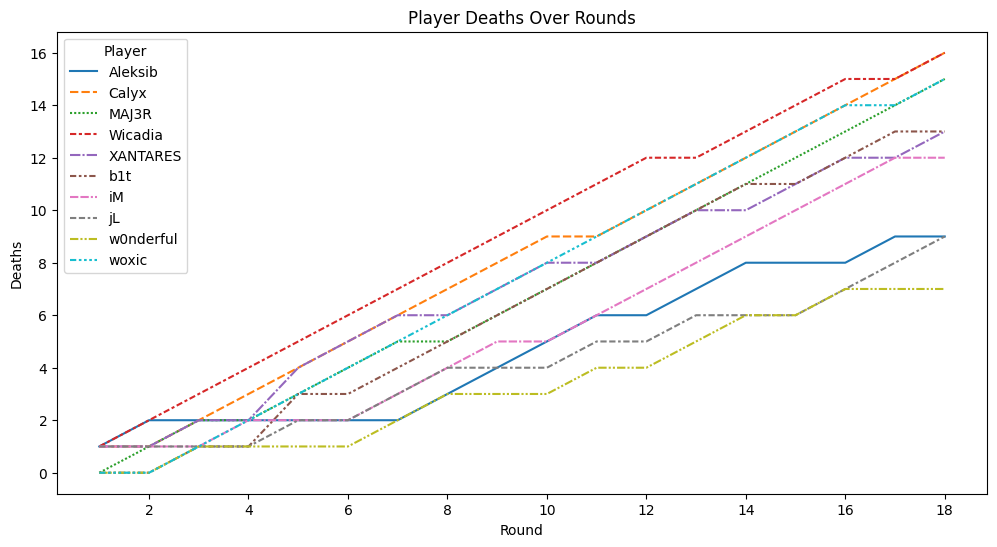

In [164]:
# Shift the round numbers so that the first round starts at 1 instead of 0
# In CS:GO demos, total_rounds_played usually starts at 0 for the first round
deaths_cumulative.index = deaths_cumulative.index + 1

# Create a figure with size 12x6 inches
plt.figure(figsize=(12,6))

# Plot cumulative deaths over rounds for each player
# Each line represents a player and shows how their total deaths increase over rounds
sns.lineplot(data=deaths_cumulative)

# Add a title to the plot
plt.title("Player Deaths Over Rounds")

# Label the x-axis (round numbers)
plt.xlabel("Round")

# Label the y-axis (cumulative deaths)
plt.ylabel("Deaths")


# Add a legend showing which line corresponds to which player
plt.legend(title="Player")

# Ensure the x-axis only shows integer values (rounds cannot be fractional)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Display the plot
plt.show()

## 3. Finding players with highest damage taken - identify players who took the most damage in the demo


In [115]:
# Display the DataFrame
df_player_hurts

,armor,attacker_name,attacker_steamid,dmg_armor,dmg_health,health,hitgroup,tick,total_rounds_played,user_name,user_steamid,weapon
0,0,XANTARES,76561198044118796,0,22,78,right_leg,2353,0,b1t,76561198246607476,hkp2000
1,79,MAJ3R,76561197967432889,21,32,68,generic,2450,0,iM,76561198050250233,hegrenade
2,0,Wicadia,76561198812513923,0,35,65,chest,2677,0,Aleksib,76561198013243326,elite
3,100,Aleksib,76561198013243326,0,115,0,head,2683,0,Wicadia,76561198812513923,glock
4,69,XANTARES,76561198044118796,10,21,47,stomach,2762,0,iM,76561198050250233,hkp2000
...,...,...,...,...,...,...,...,...,...,...,...,...
516,77,jL,76561198176878303,5,25,0,right_arm,137275,17,MAJ3R,76561197967432889,m4a1
517,81,jL,76561198176878303,6,29,71,stomach,137300,17,woxic,76561198083485506,m4a1
518,97,woxic,76561198083485506,0,139,0,head,137312,17,jL,76561198176878303,ak47
519,81,Aleksib,76561198013243326,0,128,0,head,137348,17,woxic,76561198083485506,deagle


In [165]:
# Calculate total damage taken by each player
# 'df_player_hurts' contains all player_hurt events, including who was damaged and by how much
# 'groupby("user_name")' groups the data by the player who received the damage
# '["dmg_health"].sum()' sums all the damage values for each player
# '.reset_index()' converts the result into a DataFrame with columns: 'user_name' and total damage
damage_taken = df_player_hurts.groupby('user_name')['dmg_health'].sum().reset_index()

# Display the DataFrame
damage_taken

,user_name,dmg_health
0,Aleksib,1386
1,Calyx,2564
2,MAJ3R,2139
3,Wicadia,2404
4,XANTARES,1811
5,b1t,1590
6,iM,1974
7,jL,1434
8,w0nderful,1219
9,woxic,1989


In [166]:
# Sort players by total damage taken in descending order
# 'sort_values("dmg_health", ascending=False)' arranges the DataFrame
# so that the player with the highest total damage appears first
damage_taken = damage_taken.sort_values('dmg_health', ascending=False)

# Display the DataFrame
damage_taken

,user_name,dmg_health
1,Calyx,2564
3,Wicadia,2404
2,MAJ3R,2139
9,woxic,1989
6,iM,1974
4,XANTARES,1811
5,b1t,1590
7,jL,1434
0,Aleksib,1386
8,w0nderful,1219


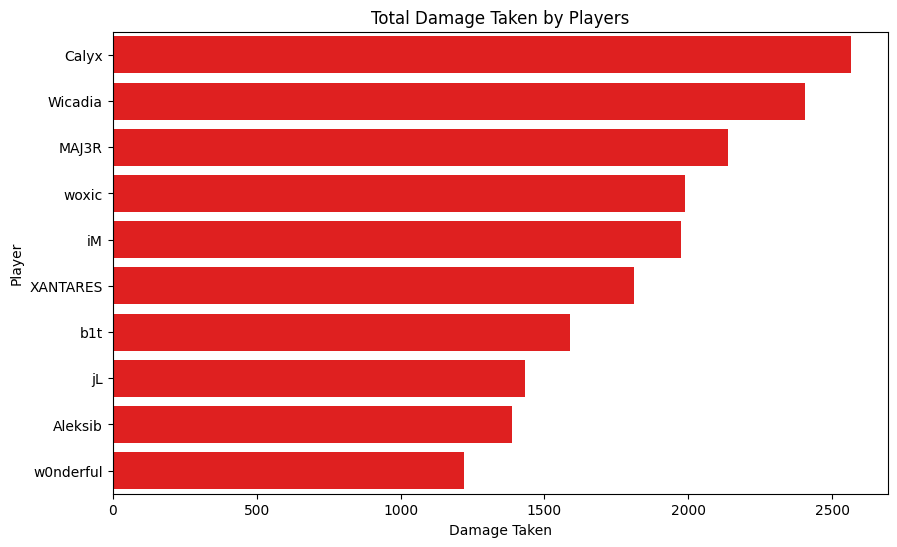

In [168]:
# Create a figure with size 10x6 inches
plt.figure(figsize=(10,6))

# Create a horizontal barplot to show total damage taken by each player
# x-axis = total damage taken, y-axis = player names
# 'color="red"' makes all bars red
sns.barplot(data=damage_taken, x="dmg_health", y="user_name", color='red')

# Add a title to the chart
plt.title("Total Damage Taken by Players")

# Label the x-axis (damage values)
plt.xlabel("Damage Taken")

# Label the y-axis (player names)
plt.ylabel("Player")

# Display the plot
plt.show()

## 4. Bomb events analysis - track bomb planting and defusing events over rounds


In [169]:
# Display the DataFrame
df_bomb_plants

,site,tick,total_rounds_played,user_name,user_steamid
0,322,3242,0,w0nderful,76561199063068840
1,323,9565,1,b1t,76561198246607476
2,322,22348,3,w0nderful,76561199063068840
3,322,36030,5,Aleksib,76561198013243326
4,323,54040,7,iM,76561198050250233
5,323,63856,8,w0nderful,76561199063068840
6,322,85875,11,Aleksib,76561198013243326
7,322,103797,12,MAJ3R,76561197967432889
8,323,109890,13,Wicadia,76561198812513923
9,322,122014,15,XANTARES,76561198044118796


In [170]:
# Display the DataFrame
df_bomb_defuses

,site,tick,total_rounds_played,user_name,user_steamid
0,323,55432,7,XANTARES,76561198044118796
1,322,123400,15,Aleksib,76561198013243326


In [171]:
# Count the number of bomb plants in each round
# 'df_bomb_plants' contains all bomb planted events, including the round they occurred in
# 'groupby("total_rounds_played")' groups the events by round number
# '.size()' counts how many bomb plants occurred in each round
# '.reset_index(name="plants")' converts the result into a DataFrame with columns:
# 'total_rounds_played' and 'plants' (number of bomb plants in that round)
plants_per_round = df_bomb_plants.groupby("total_rounds_played").size().reset_index(name="plants")

# Display the DataFrame
plants_per_round

,total_rounds_played,plants
0,0,1
1,1,1
2,3,1
3,5,1
4,7,1
5,8,1
6,11,1
7,12,1
8,13,1
9,15,1


In [172]:
# Count the number of bomb defuses in each round
# 'df_bomb_defuses' contains all bomb defused events, including the round they occurred in
# 'groupby("total_rounds_played")' groups the events by round number
# '.size()' counts how many bomb defuses occurred in each round
# '.reset_index(name="defuses")' converts the result into a DataFrame with columns:
# 'total_rounds_played' and 'defuses' (number of bomb defuses in that round)
defuses_per_round = df_bomb_defuses.groupby("total_rounds_played").size().reset_index(name="defuses")

# Display the DataFrame
defuses_per_round

,total_rounds_played,defuses
0,7,1
1,15,1


In [173]:
# Merge bomb plants and defuses per round into a single DataFrame
# 'pd.merge' combines 'plants_per_round' and 'defuses_per_round' on the 'total_rounds_played' column
# 'how="outer"' ensures all rounds are included, even if a round has only plants or only defuses
# '.fillna(0)' replaces missing values with 0 (e.g., no plants or defuses in a round)
# '.astype(int)' ensures all counts are integers
bomb_events = pd.merge(plants_per_round, defuses_per_round, on="total_rounds_played", how="outer").fillna(0).astype(int)

# Display the DataFrame
bomb_events

,total_rounds_played,plants,defuses
0,0,1,0
1,1,1,0
2,3,1,0
3,5,1,0
4,7,1,1
5,8,1,0
6,11,1,0
7,12,1,0
8,13,1,0
9,15,1,1


In [175]:
# Set 'total_rounds_played' as the index to have rounds as rows
# Then calculate the cumulative sum of bomb plants and defuses over the rounds
# '.cumsum()' computes a running total so we can see how many bomb plants and defuses
# have occurred up to each round
bomb_events_cumulative = bomb_events.set_index("total_rounds_played").cumsum()

# Display the DataFrame
bomb_events_cumulative

,plants,defuses
total_rounds_played,,
0,1,0
1,2,0
3,3,0
5,4,0
7,5,1
8,6,1
11,7,1
12,8,1
13,9,1


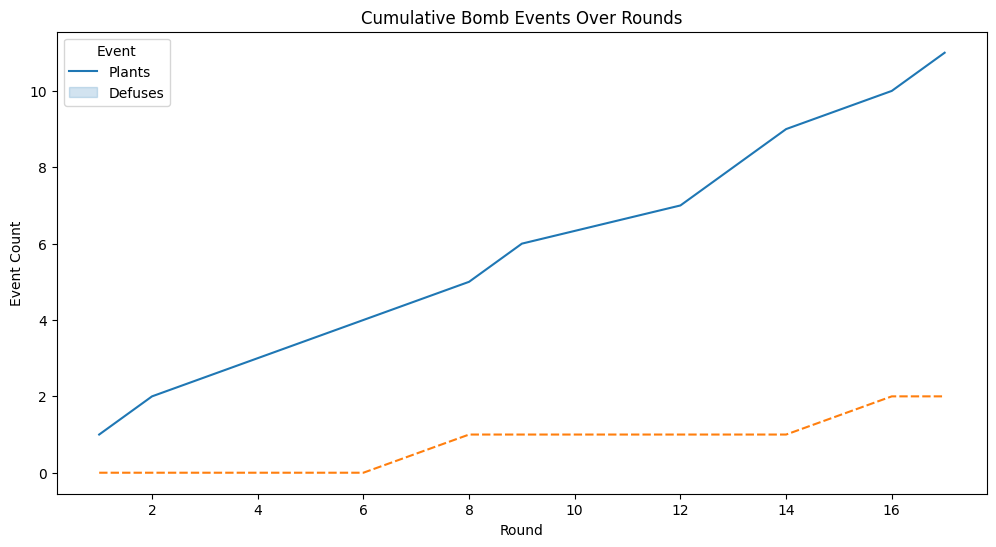

In [176]:
# Shift the round numbers so the first round starts at 1 instead of 0
# In CS:GO demos, 'total_rounds_played' starts at 0 for the first round
bomb_events_cumulative.index = bomb_events_cumulative.index + 1

# Create a figure with size 12x6 inches
plt.figure(figsize=(12,6))

# Plot cumulative bomb plants and defuses over rounds
# Each line represents one type of bomb event ('plants' or 'defuses')
sns.lineplot(data=bomb_events_cumulative)

# Add a title to the plot
plt.title("Cumulative Bomb Events Over Rounds")

# Label the x-axis (round number)
plt.xlabel("Round")

# Label the y-axis (cumulative count of events)
plt.ylabel("Event Count")

# Ensure x-axis only shows integer values (rounds cannot be fractional)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Add a legend with proper labels for each line
plt.legend(title="Event", labels=["Plants", "Defuses"])

# Display the plot
plt.show()